In [ ]:
# Description: This program predicts if a passenger will survive or not

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data
titanic = sns.load_dataset('titanic')

# print the first 10 rows of data
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
# count the number of rows and columns in the dataset
titanic.shape

(891, 15)

In [ ]:
# Get some statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Get the count of number of survivors
titanic['survived'].value_counts()


0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


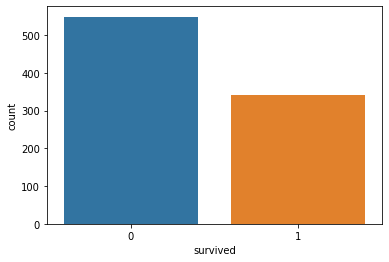

In [ ]:
# Visualize this count
sns.countplot(titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

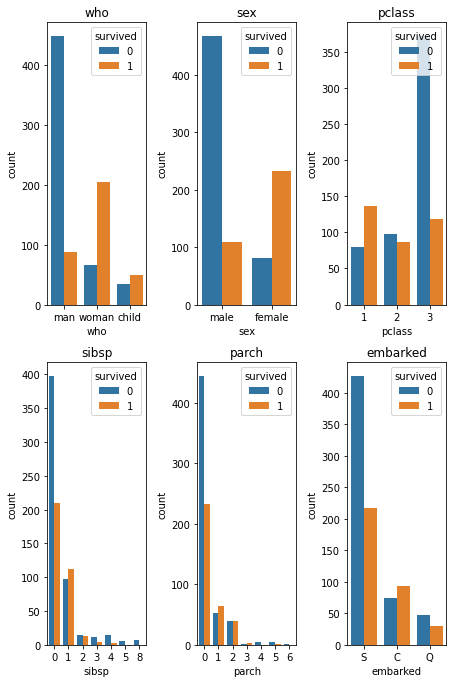

In [ ]:
# Visualize the count of survivors for columns 'who','sex','pclass','sibsp','parch','embarked'

cols = ['who','sex','pclass','sibsp','parch','embarked']

n_rows = 2
n_cols = 3

# The subplot grid and figure size of each graph

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_rows * 3.2, n_cols * 3.2))

for r in range(0, n_rows):

  for c in range(0, n_cols):
    i = r*n_cols + c  # index to go through the number of columns
    ax = axs[r][c]    # show where to position each subplot

    sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax = ax)

    ax.set_title(cols[i])
    ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout()



In [ ]:
# Look at survival rate by sex

titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
# Look at survival rate by sex and class

titanic.pivot_table('survived', index='sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


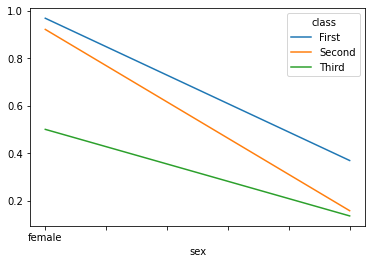

In [ ]:
# Look at survival rate by sex and class visually

titanic.pivot_table('survived', index='sex', columns = 'class').plot()

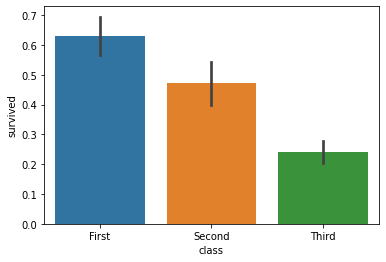

In [ ]:
# plot the survival rate of each class
sns.barplot(x = 'class',y = 'survived',data = titanic)


In [ ]:
# Look at survival rate by age, sex and class

age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

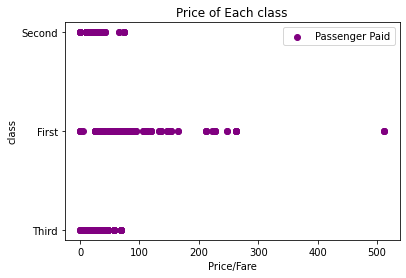

In [ ]:
# plot the prices paid for each class
plt.scatter(titanic['fare'],titanic['class'], color='purple', label='Passenger Paid')
plt.ylabel('class')
plt.xlabel('Price/Fare')
plt.title('Price of Each class')
plt.legend()
plt.show()


In [ ]:
# count the empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# look at all the value in each column and get a count

for val in titanic:
  print(titanic[val].value_counts())
  print()
  


0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [ ]:
# Drop the columns

titanic = titanic.drop(['deck','embark_town','alive','class','who','alone','adult_male'], axis=1)

# Remove rows with missing values
titanic = titanic.dropna(subset = ['embarked','age'])


In [ ]:
# count the new number of rows and columns in dataset
titanic.shape

(712, 8)

In [ ]:
# look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
# print the unique values in the column

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

# Encode the embarked column
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [ ]:
# print the unique values in the column

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
# look at the data types
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
# Split the data into independent 'X' and dependent 'Y' variables

X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [ ]:
# split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create a function with many machine learning models

def models(X_train,Y_train):
  # Use Logisstic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train,Y_train)

  # Use kNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train,Y_train)

  # Use Support Vector Classifiers (SVC) [Linear Kernel]
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train,Y_train)

  # Use SVC ( RBF Kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train,Y_train)
  
  # Use Gaussian Naive bayes
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train,Y_train)

  # Use Descision tree classifier
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train,Y_train)

  # Use the random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train,Y_train)

  # print the training accuracy for each model
  print('[0]Logistic Regression training accuracy: ',log.score(X_train,Y_train))
  print('[1]kNeighbors training accuracy: ',knn.score(X_train,Y_train))
  print('[2] (SVC) [Linear Kernel] training accuracy: ',svc_lin.score(X_train,Y_train))
  print('[3SVC ( RBF Kernel) training accuracy: ',svc_rbf.score(X_train,Y_train))
  print('[4]Gaussian Naive bayes training accuracy: ',gauss.score(X_train,Y_train))
  print('[5]Descision tree classifier training accuracy: ',tree.score(X_train,Y_train))
  print('[6]random forest classifier training accuracy: ',forest.score(X_train,Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest 

In [ ]:
# Get and train all of the models
model = models(X_train,Y_train)

[0]Logistic Regression training accuracy:  0.7978910369068541
[1]kNeighbors training accuracy:  0.8664323374340949
[2] (SVC) [Linear Kernel] training accuracy:  0.7768014059753954
[3SVC ( RBF Kernel) training accuracy:  0.8506151142355008
[4]Gaussian Naive bayes training accuracy:  0.8031634446397188
[5]Descision tree classifier training accuracy:  0.9929701230228472
[6]random forest classifier training accuracy:  0.9753954305799648


In [ ]:
# show the confusion matrix and accuracy for all the models on the test data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  # Extract the TrueNegative(TN), FalseNegative(FN), FalsePositive(FP), TruePositive(TP)
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  test_score = (TP + TN) / (TP + TN + FP + FN)

  print(cm)
  print('Model[{}] Testing Accuracy = "{}" '.format(i,test_score))
  print()


[[73  9]
 [18 43]]
Model[0] Testing Accuracy = "0.8111888111888111" 

[[71 11]
 [20 41]]
Model[1] Testing Accuracy = "0.7832167832167832" 

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902" 

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972" 

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482" 

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763" 

[[67 15]
 [13 48]]
Model[6] Testing Accuracy = "0.8041958041958042" 



In [ ]:
# Get Feature Importance
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending= False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


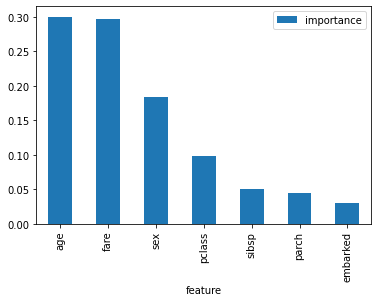

In [ ]:
# visualize the importances
importances.plot.bar()

In [ ]:
# print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

# print the actual values
print(Y_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
# i will make prediction on me if i will surive or not
my_survival = [[1, 1, 21, 0, 0, 0, 1]]
# my_survival = [[1, 0, 21, 0, 0, 300, 1]]       # survived
# scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# print prediction of my survival using random forest classifier
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
  print("You didn't survived")
else:
  print("Oh! You survived")


[0]
You didn't survived
